In [1]:
# I imported necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# the dataset I using for this project
# was from my previous ann_regression
# Project1 as it is already cleaned
# and ready to use
df = pd.read_csv("white_wine_cleaned.csv")

In [3]:
# checked for any duplicates
# although I know it be zero
# however, just to be ascertain
df = df.drop_duplicates()

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [5]:
# from previous Project
# I used alcohol as my targeted variable
# in this Project2 Classification
# I am using quality as the targeted variable
df['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

In [6]:
# from above it is shown that
# 3 and 9 have low occurence 
# just 25 altogether
# then I will consider qualities between 
# 4 and 8 because they have 
# higher number of occurence
accepted_qualities = [5, 6, 7]
df = df[df['quality'].isin(accepted_qualities)]

In [7]:
# getting the value counts
df['quality'].value_counts()

quality
6    1788
5    1175
7     689
Name: count, dtype: int64

In [8]:
# in this line of code
# the target variable is dropped
X = df.drop("quality", axis=1)

# having the targeted variable as dependent variable
y_temp = df['quality']

# since we are doing In classification, 
# an encoder used to process the target values
# which then convert into a categorical TensorFlow/Keras (format) 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [9]:
# the train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [10]:
# this line of code saves
# the categories into a list
# and print out the list result 
categories = list(np.unique(df['quality']))
print(categories)

[5, 6, 7]


In [11]:
# building the Neural Network
# and training the model
# slight observation below that
# there is no optimizations, 
# which has shown that it has not work in this case
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1_l2()),
        layers.Dropout(0.1),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Admin\DeepLearningSpringNew2024\DeepLearningSpringNew2024\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,471 (13.56 KB)

 Trainable params: 3,449 (13.47 KB)

 Non-trainable params: 22 (88.00 B)

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4058 - loss: 1.0660 - val_accuracy: 0.4818 - val_loss: 1.0361
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5430 - loss: 0.9470 - val_accuracy: 0.4562 - val_loss: 1.0241
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5459 - loss: 0.8967 - val_accuracy: 0.5018 - val_loss: 0.9252
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5736 - loss: 0.8770 - val_accuracy: 0.5602 - val_loss: 0.8716
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5867 - loss: 0.8720 - val_accuracy: 0.6095 - val_loss: 0.8353
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5940 - loss: 0.8538 - val_accuracy: 0.6077 - val_loss: 0.8308
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5773 - loss: 0.8566 - val_accuracy: 0.6113 - val_loss: 0.8311
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5954 - loss: 0.8498 - val_accuracy: 0.6077 - 

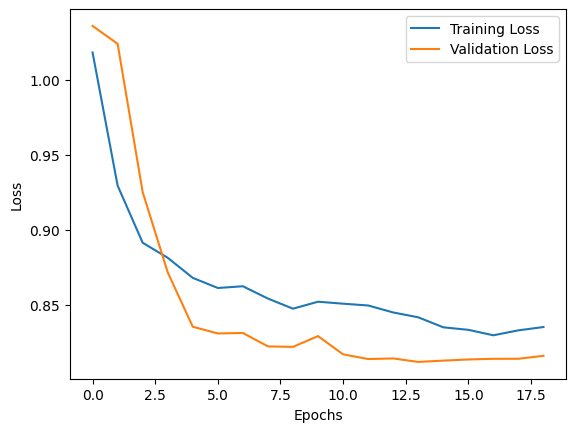

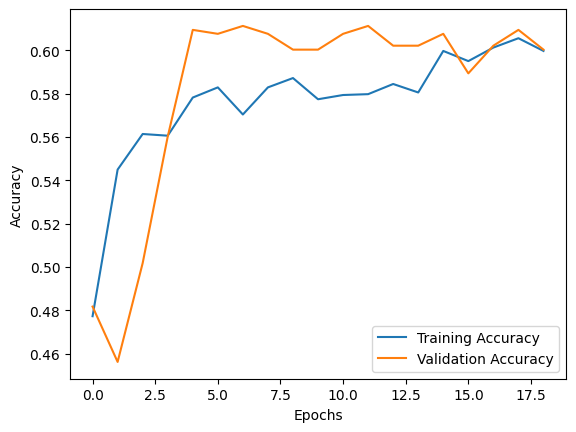

In [12]:
# 
# this is the optimization model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.809102475643158, 0.6094890236854553]

Train data evaluation:
[0.8029441833496094, 0.6208920478820801]


In [14]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities

# basically we are reverting the cross entropy
# format back to the original target variable format
# instead [0,1,0,0] => 0 or 1 or 2 or 3
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<Axes: >

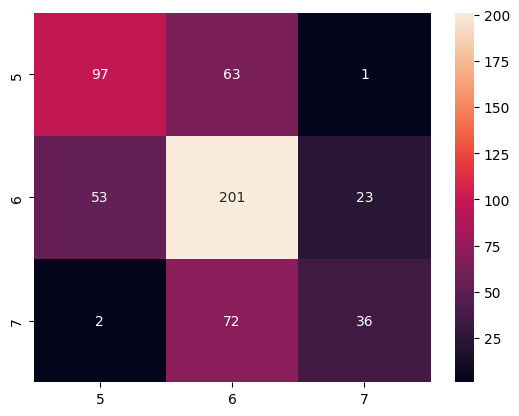

In [15]:
# the original heatmap without label names
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

# you can also use the actual names for the categories
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [16]:
# the classification report based on true values and predictions
# fi-score
# precision
# and recall
# low accuracy 
# shows the model is moderate in performance
# meaning it will predict pretty well
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       161
           1       0.60      0.73      0.66       277
           2       0.60      0.33      0.42       110

    accuracy                           0.61       548
   macro avg       0.61      0.55      0.57       548
weighted avg       0.61      0.61      0.60       548


Model overall accuracy: 60.95%


In [17]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7781531997959892